In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import plotly.express as px

File Path Constant

In [18]:
file_path = {
    "filled_data": "../Data/filled_data.csv"
}

Read Data as DataFrame

In [19]:
df = pd.read_csv(file_path["filled_data"])

In [20]:
df["Year"] = df["Year"].astype(int)

## Tổng quan dữ liệu:
| Thông tin            | Giá trị                                                                                                                                        |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Số dòng dữ liệu:** | 3990                                                                                                                                          |
| **Số quốc gia:**     | 190                                                                                                                                           |
| **Khoảng năm:**      | 2001 → 2021                                                                                                                                    |
| **Các cột chính:**   | `country`, `iso_code`, `year`, `ft_co2`, `ft_hdi`, `ft_industr_on_gdp`, `ft_deforest_area_ha`, `ft_forest_area_percent`, `ft_forest_area_sqkm` |

Mô tả nhanh một số biến:



In [21]:
#Lấy các cột đặc trưng
feature_cols = df.select_dtypes(include=['float64', 'int64']).columns
feature_cols = [col for col in feature_cols if col not in ['Year']]

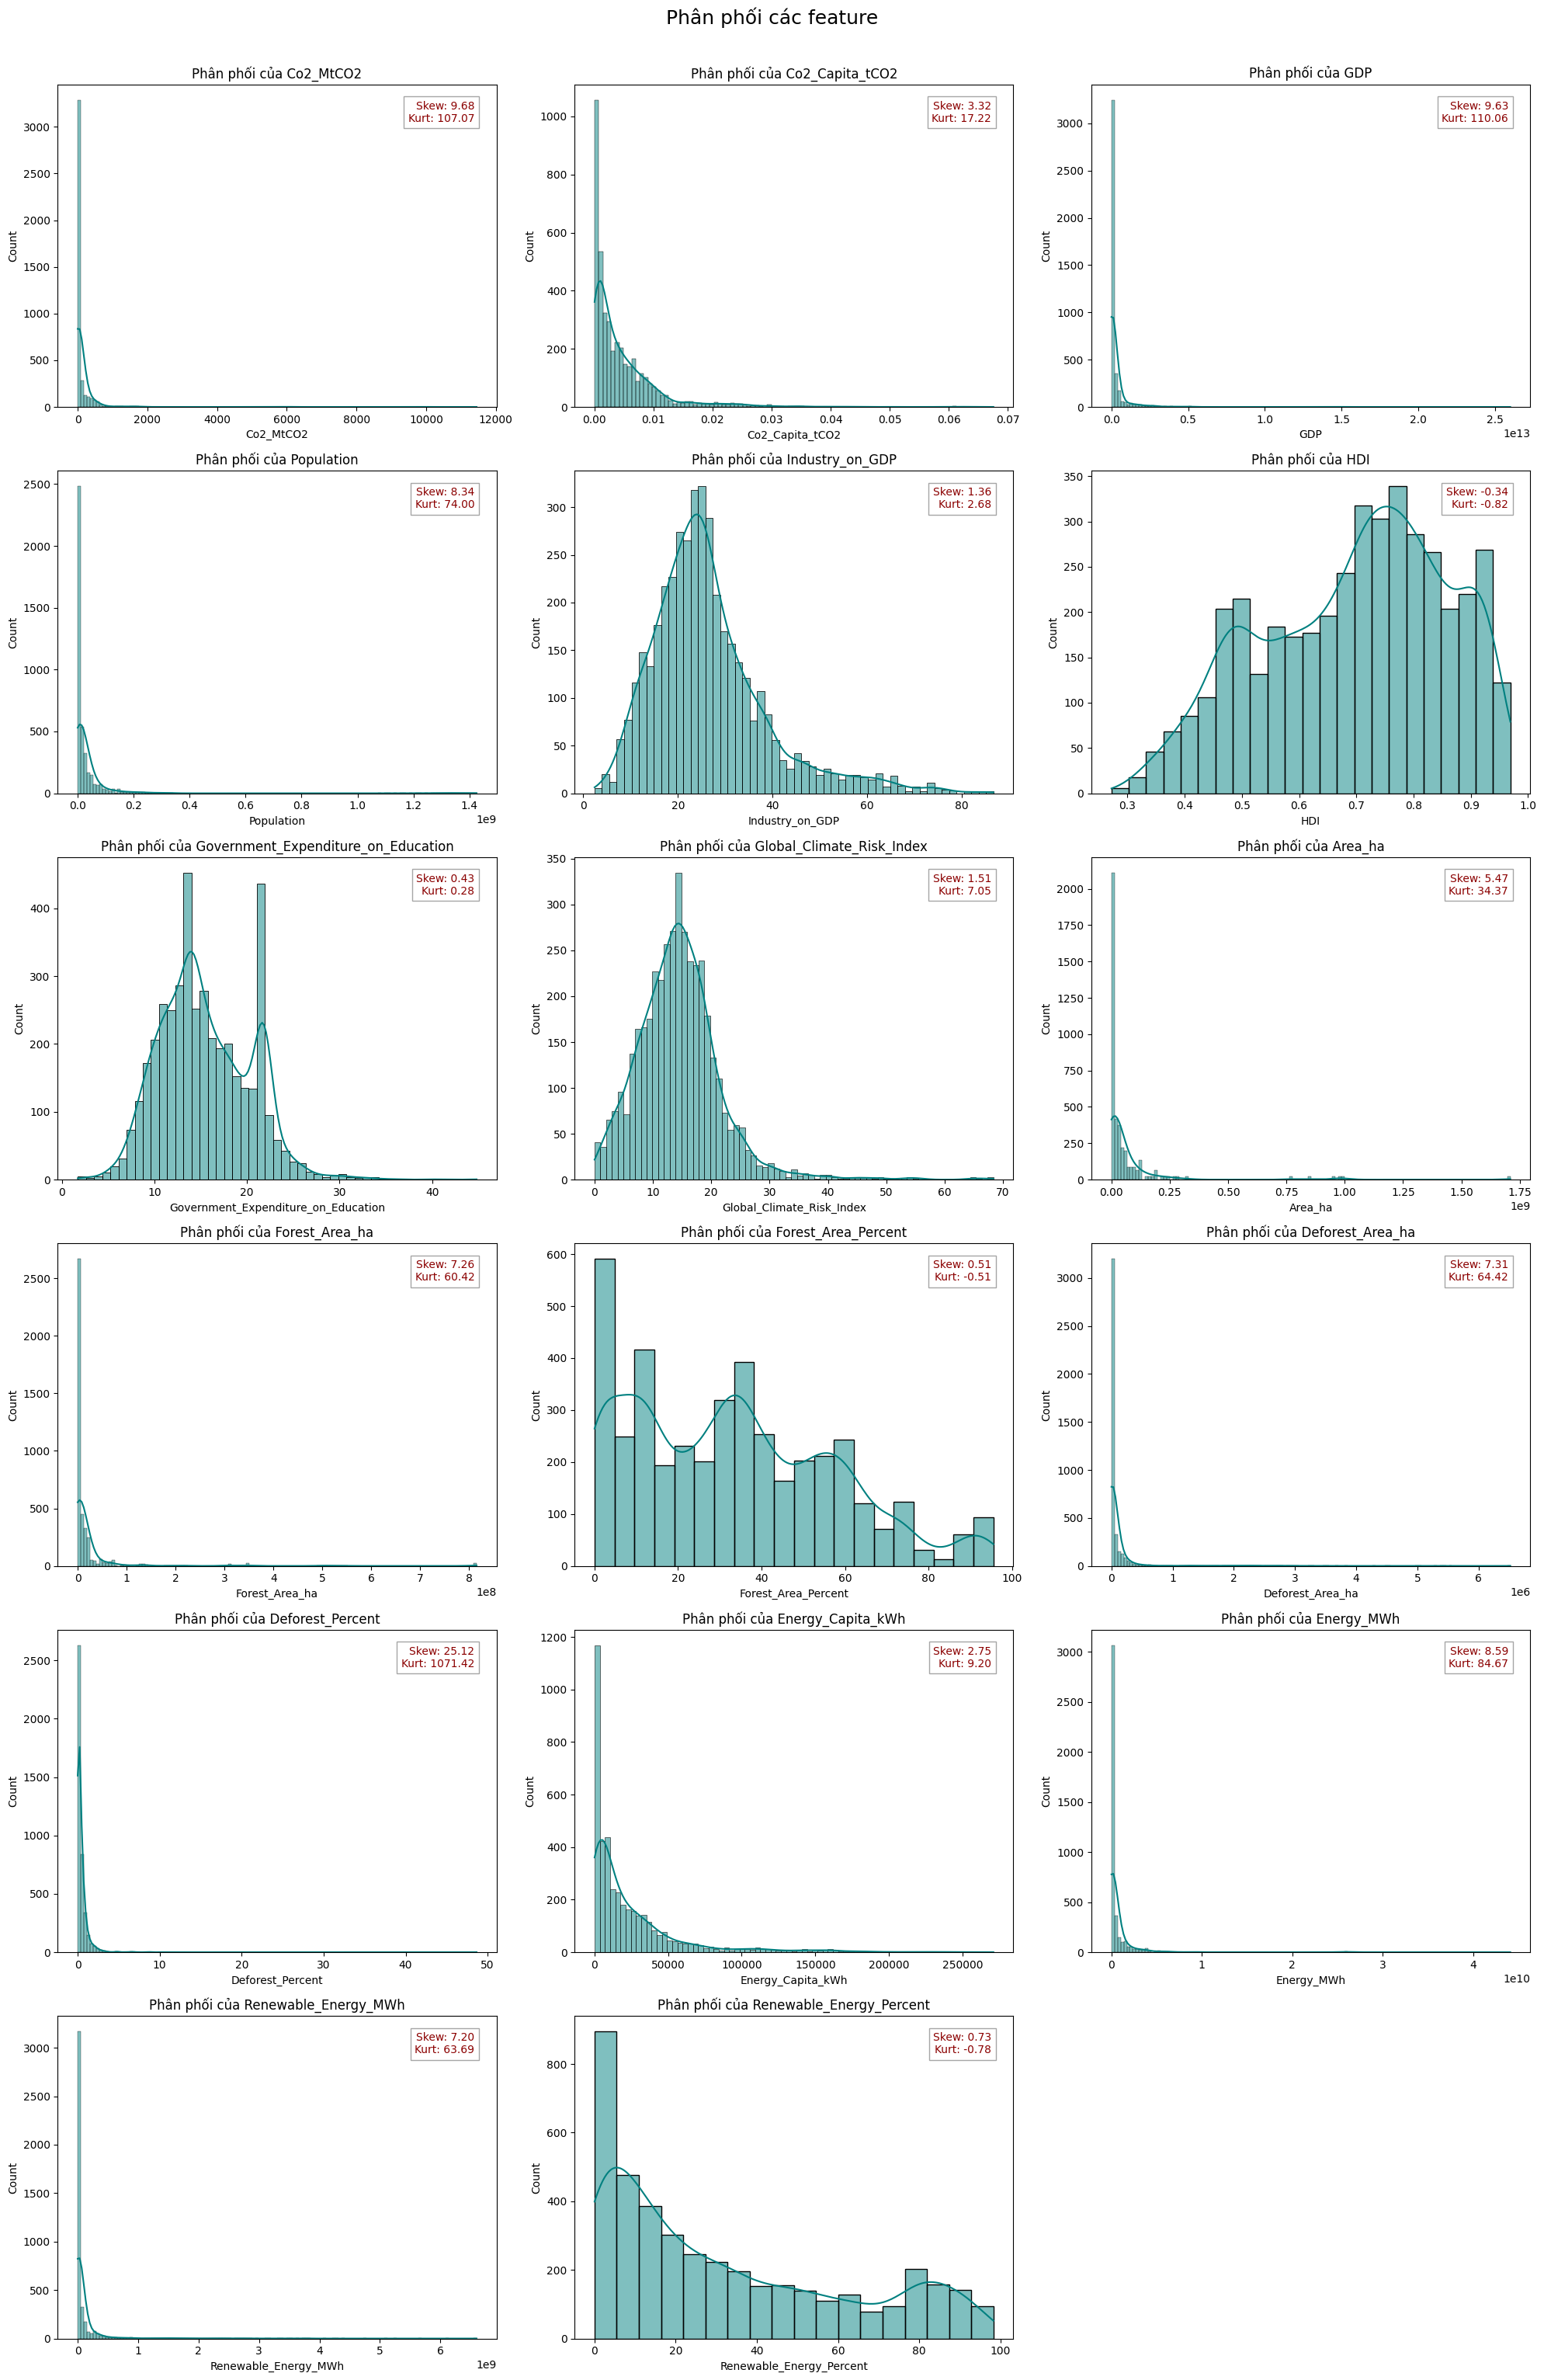

In [22]:
n_cols = 3  # số cột biểu đồ mỗi hàng
n_rows = -(-len(feature_cols) // n_cols)  # làm tròn lên

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows),sharey=False)
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Phân phối của {col}')

    skew_val = df[col].skew()
    kurt_val = df[col].kurt()
    axes[i].text(
        0.95, 0.95,
        f'Skew: {skew_val:.2f}\nKurt: {kurt_val:.2f}',
        transform=axes[i].transAxes,
        fontsize=10,
        color='darkred',
        ha='right',
        va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )
    axes[i].autoscale(enable=True, axis='y')
# Xóa các ô trống (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Phân phối các feature", fontsize=18, y=1.02)
plt.show()

## Analysis of CO₂ Emissions by Country

In [23]:
import nbformat
print(nbformat.__version__)

5.10.4


In [24]:
# --- Bản đồ tương tác theo thời gian ---
fig1 = px.choropleth(
    df,
    width=1200,
    height=800,
    locations="ISO_Code",
    color="Co2_MtCO2",
    hover_name="Country",
    animation_frame="Year",
    color_continuous_scale="YlOrBr",
    title="Biến động phát thải CO₂ theo thời gian (2001–2021)",
)

fig1.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
    coloraxis_colorbar=dict(title="Phát thải CO₂ (MtCO2)"),
)
fig1.show()

In [25]:
# --- Lấy top 10 quốc gia mỗi năm ---
top10_per_year = (
    df.groupby("Year")
    .apply(lambda x: x.nlargest(10, "Co2_MtCO2"))
    .reset_index(drop=True)
)

# --- Vẽ biểu đồ động ---
fig = px.bar(
    top10_per_year,
    x="Co2_MtCO2",
    y="Country",
    color="Country",
    animation_frame="Year",
    orientation="h",
    title="Top 10 Countries with Highest CO₂ Emissions (2001–2021)",
    labels={"ft_co2": "CO₂ Emissions (MtCO₂)", "country": "Country"},
    height=700,
    color_discrete_sequence=px.colors.qualitative.Prism
)

# --- Tùy chỉnh ---
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    showlegend=False
)

fig.show()

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_9756/139127392.py:4: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



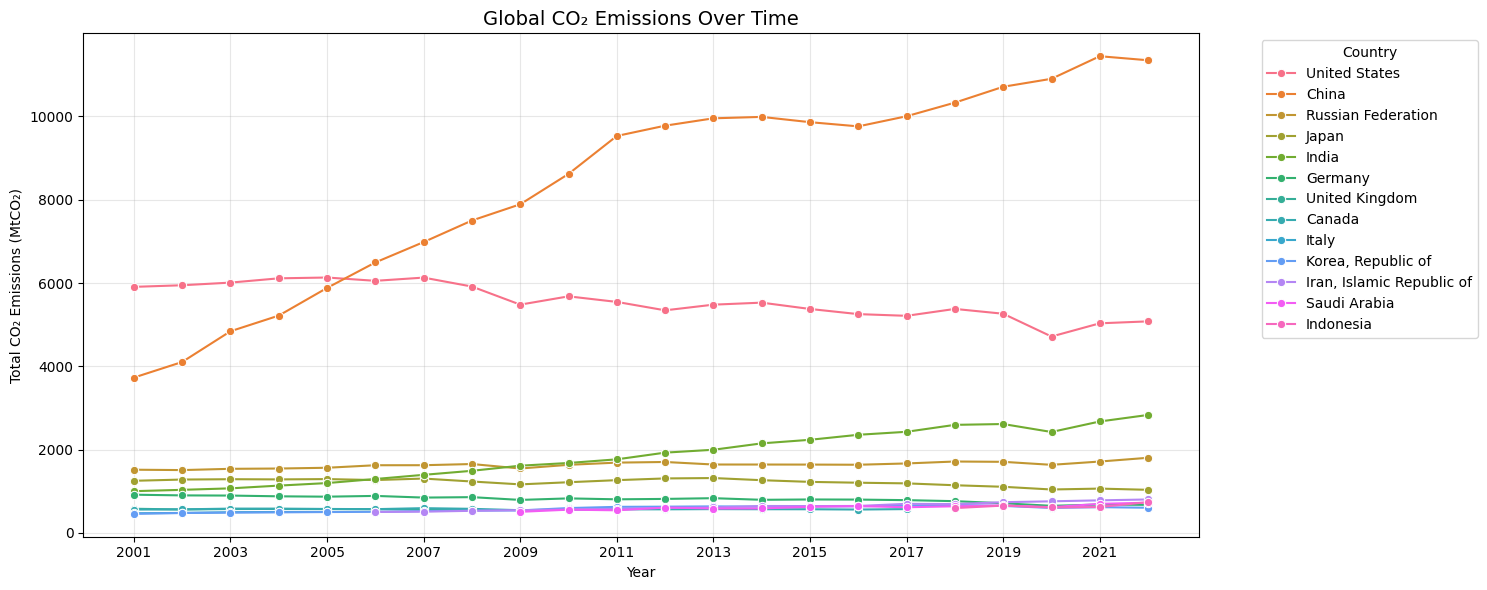

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(data=top10_per_year, x="Year", y="Co2_MtCO2",hue='Country', marker="o", color="teal")
plt.title("Global CO₂ Emissions Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (MtCO₂)")
plt.legend(title="Country",bbox_to_anchor=(1.05, 1),loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(
    ticks=range(int(df['Year'].min()), int(df['Year'].max()) + 1, 2)
)
plt.tight_layout()
plt.show()

In [27]:
# --- Lấy top 10 quốc gia mỗi năm ---
top10_capita_per_year = (
    df.groupby("Year")
    .apply(lambda x: x.nlargest(10, "Co2_Capita_tCO2"))
    .reset_index(drop=True)
)

# --- Vẽ biểu đồ động ---
fig = px.bar(
    top10_capita_per_year,
    x="Co2_Capita_tCO2",
    y="Country",
    color="Country",
    animation_frame="Year",
    orientation="h",
    title="Top 10 Countries with Highest CO₂ Capita(2001–2021)",
    labels={"Co2_MtCO2": "CO₂ Emissions (tCO₂)", "Country": "Country"},
    height=700,
    color_discrete_sequence=px.colors.qualitative.Prism
)

# --- Tùy chỉnh ---
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    showlegend=False
)

fig.show()

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_9756/577774391.py:4: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_9756/2039508911.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




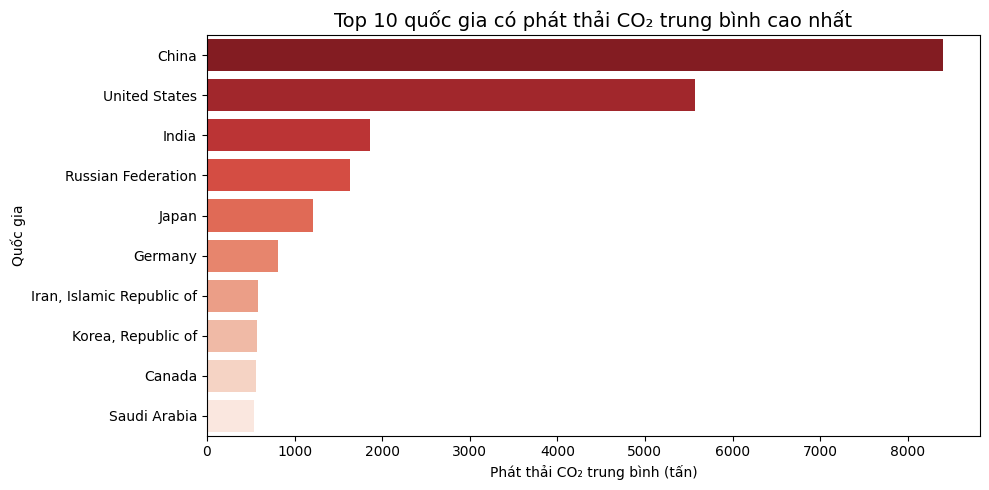

In [28]:
# --- Top 10 quốc gia phát thải cao nhất ---
top10 = df.groupby("Country")["Co2_MtCO2"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title("Top 10 quốc gia có phát thải CO₂ trung bình cao nhất", fontsize=14)
plt.xlabel("Phát thải CO₂ trung bình (tấn)")
plt.ylabel("Quốc gia")
plt.tight_layout()
plt.show()

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_9756/1749053960.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




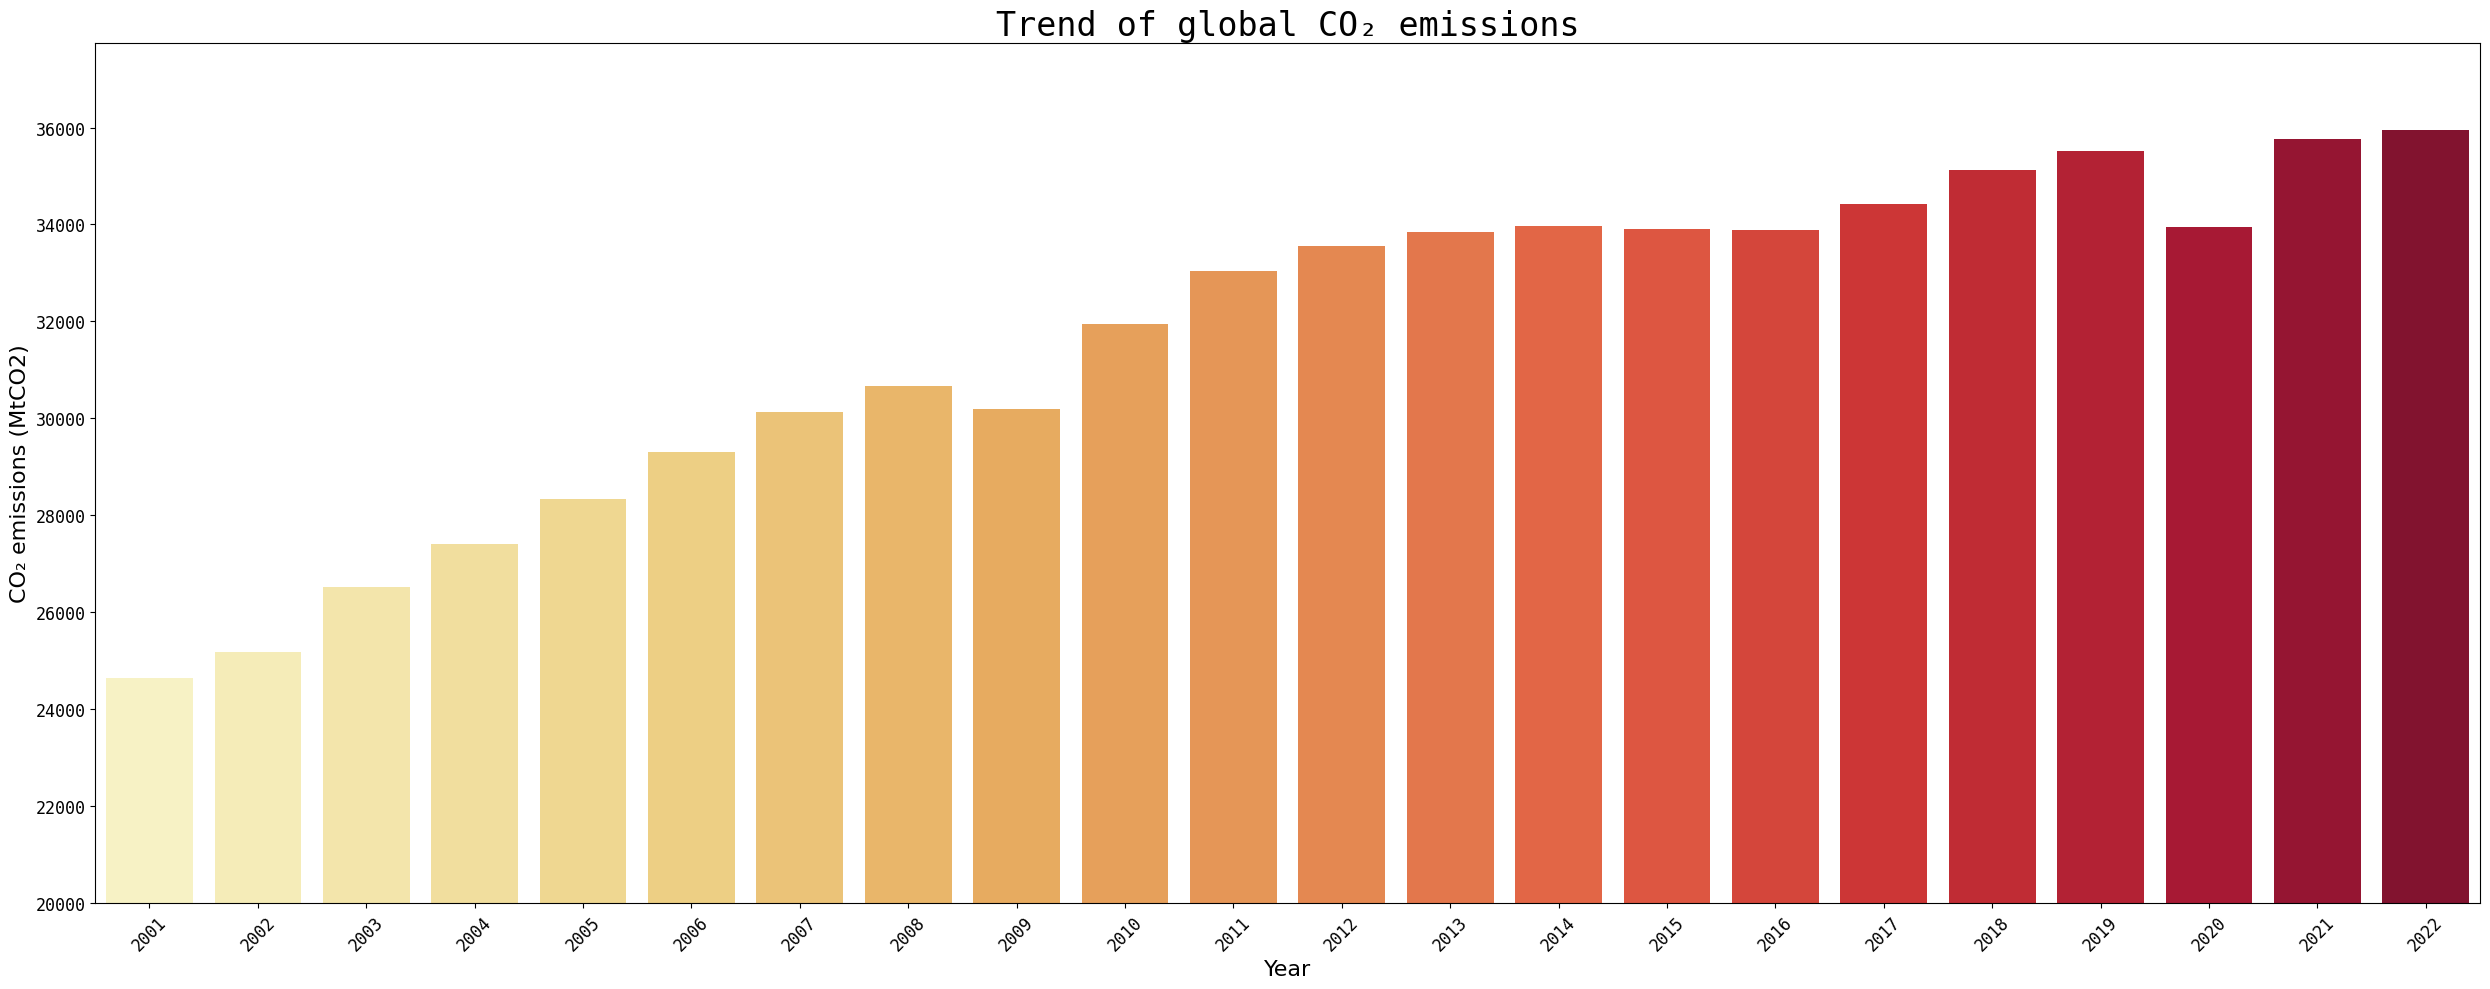

In [29]:
global_co2 = df.groupby("Year")["Co2_MtCO2"].sum().reset_index()

plt.figure(figsize=(25,10))
sns.barplot(data=global_co2, x="Year", y="Co2_MtCO2",  palette="YlOrRd")
plt.title("Trend of global CO₂ emissions", fontsize=24,fontfamily='monospace')
plt.xlabel("Year",fontsize=16)
plt.ylabel("CO₂ emissions (MtCO2)",fontsize=16)
plt.xticks(fontsize=12, fontfamily='monospace', rotation=45)
plt.yticks(fontsize=12, fontfamily='monospace')
plt.ylim(20000, global_co2["Co2_MtCO2"].max() * 1.05)
plt.tight_layout()
plt.show()

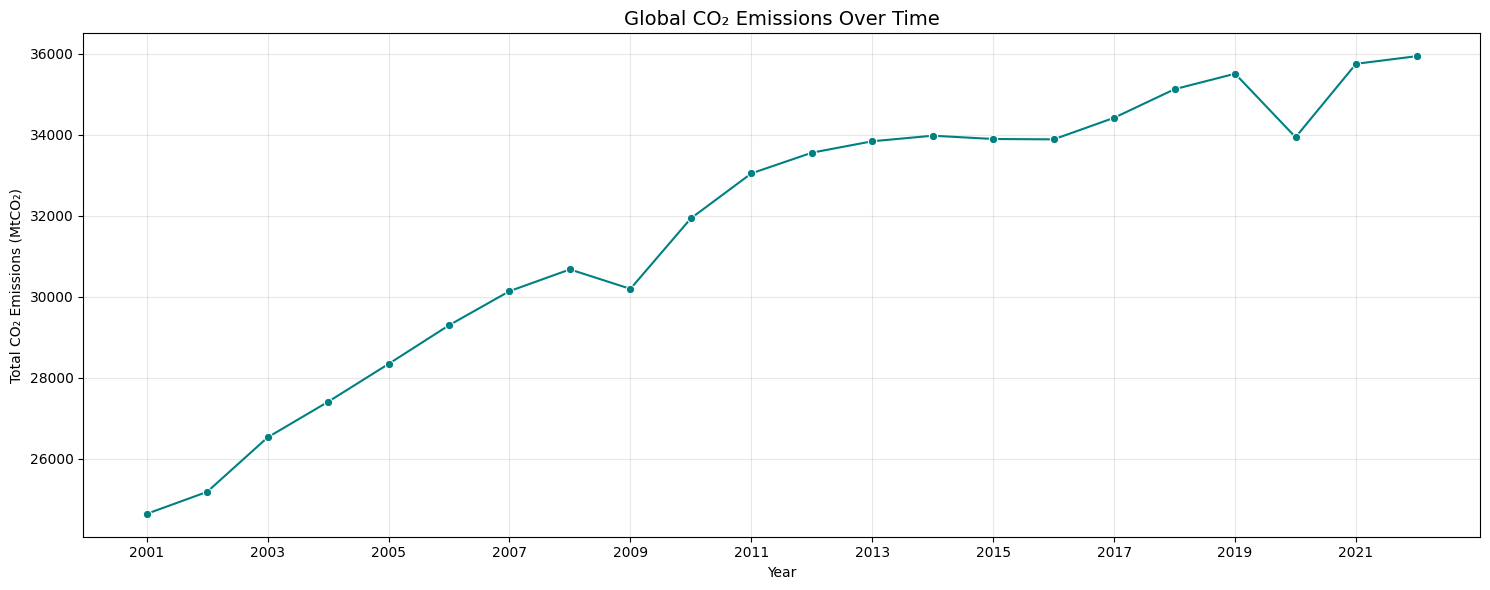

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(data=global_co2, x="Year", y="Co2_MtCO2", marker="o", color="teal")
plt.title("Global CO₂ Emissions Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (MtCO₂)")
plt.grid(True, alpha=0.3)
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max()+1, 2))
plt.tight_layout()
plt.show()

## Analysis of CO₂ Emissions by Continent

In [31]:
# --- Thêm cột châu lục từ mã quốc gia ---
def get_continent(iso_code):
    try:
        country_alpha2 = iso_code[:2]  # ISO dạng 3 ký tự, lấy 2 ký tự đầu
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

df["Continent"] = df["ISO_Code"].apply(get_continent)

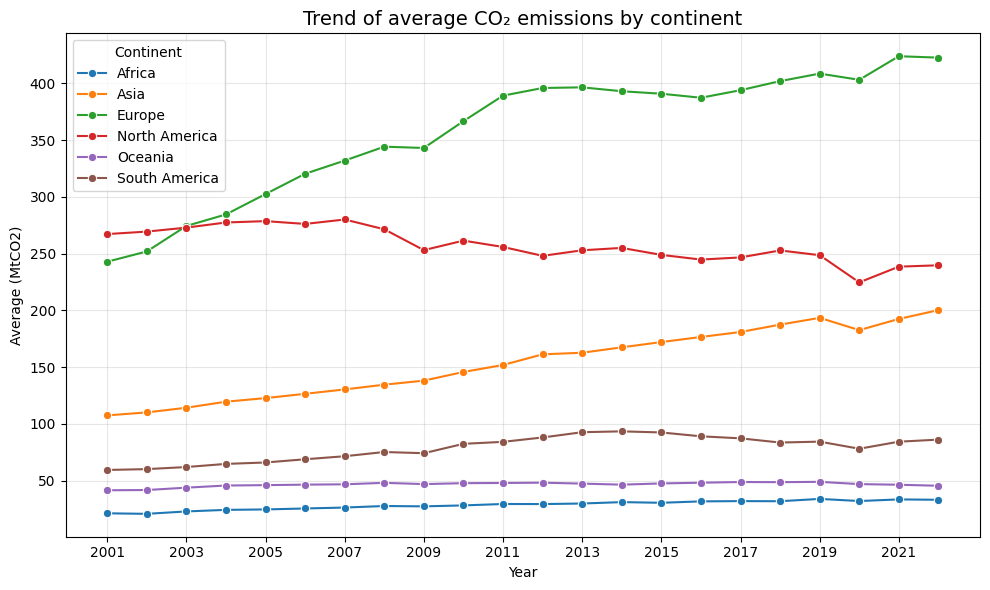

In [32]:
# ---Trung bình CO2 theo châu lục ---
continent_co2 = df.groupby(["Continent", "Year"])["Co2_MtCO2"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=continent_co2, x="Year", y="Co2_MtCO2", hue="Continent", marker="o")
plt.title("Trend of average CO₂ emissions by continent", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average (MtCO2)")
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max()+1, 2))
plt.legend(title="Continent")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analysis of CO₂ Emissions by HDI Group

In [37]:
# --- Thêm cột nhóm HDI ---
def hdi_group(hdi):
    if hdi < 0.55:
        return "Low"
    elif hdi < 0.7:
        return "Medium"
    elif hdi < 0.8:
        return "High"
    else:
        return "very High"

df["HDI_group"] = df["HDI"].apply(hdi_group)

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_9756/307041893.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




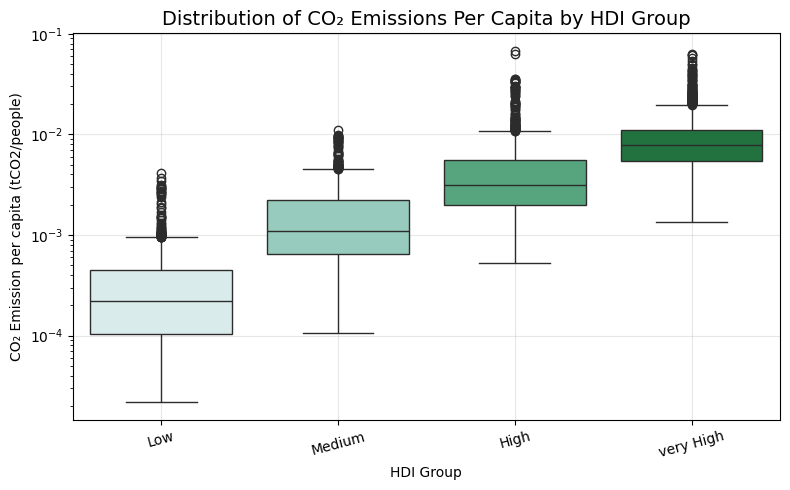

In [38]:
# --- Phân phối CO₂ theo nhóm thu nhập ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="HDI_group", y="Co2_Capita_tCO2", palette="BuGn")
plt.title("Distribution of CO₂ Emissions Per Capita by HDI Group", fontsize=14)
plt.xlabel("HDI Group")
plt.ylabel("CO₂ Emission per capita (tCO2/people)")
plt.xticks(rotation=15)
plt.yscale("log")  # scale log để nhìn rõ hơn
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

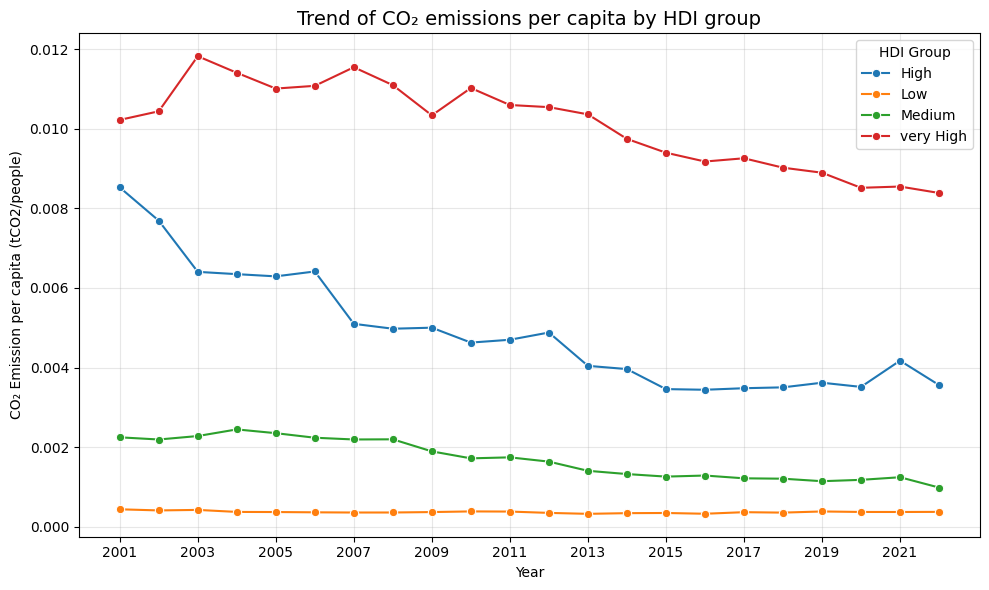

In [39]:
# ---Trung bình CO2 theo nhóm HDI
HDI_co2 = df.groupby(["HDI_group", "Year"])["Co2_Capita_tCO2"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=HDI_co2, x="Year", y="Co2_Capita_tCO2", hue="HDI_group", marker="o")
plt.title("Trend of CO₂ emissions per capita by HDI group", fontsize=14)
plt.xlabel("Year")
plt.ylabel("CO₂ Emission per capita (tCO2/people)")
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max()+1, 2))
plt.legend(title="HDI Group")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

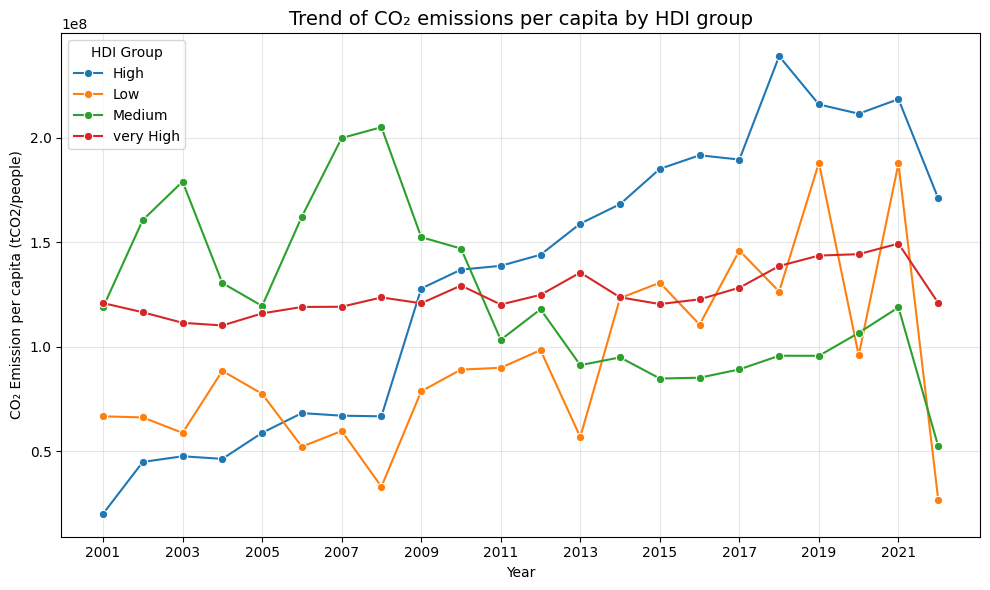

In [40]:
# ---Trung bình CO2 theo nhóm HDI
HDI_co2 = df.groupby(["HDI_group", "Year"])["Renewable_Energy_MWh"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=HDI_co2, x="Year", y="Renewable_Energy_MWh", hue="HDI_group", marker="o")
plt.title("Trend of CO₂ emissions per capita by HDI group", fontsize=14)
plt.xlabel("Year")
plt.ylabel("CO₂ Emission per capita (tCO2/people)")
plt.xticks(ticks=range(df['Year'].min(), df['Year'].max()+1, 2))
plt.legend(title="HDI Group")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/4d/4d38bl_s3qzd3rn2rpd6bjgc0000gn/T/ipykernel_9756/1360011292.py:17: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



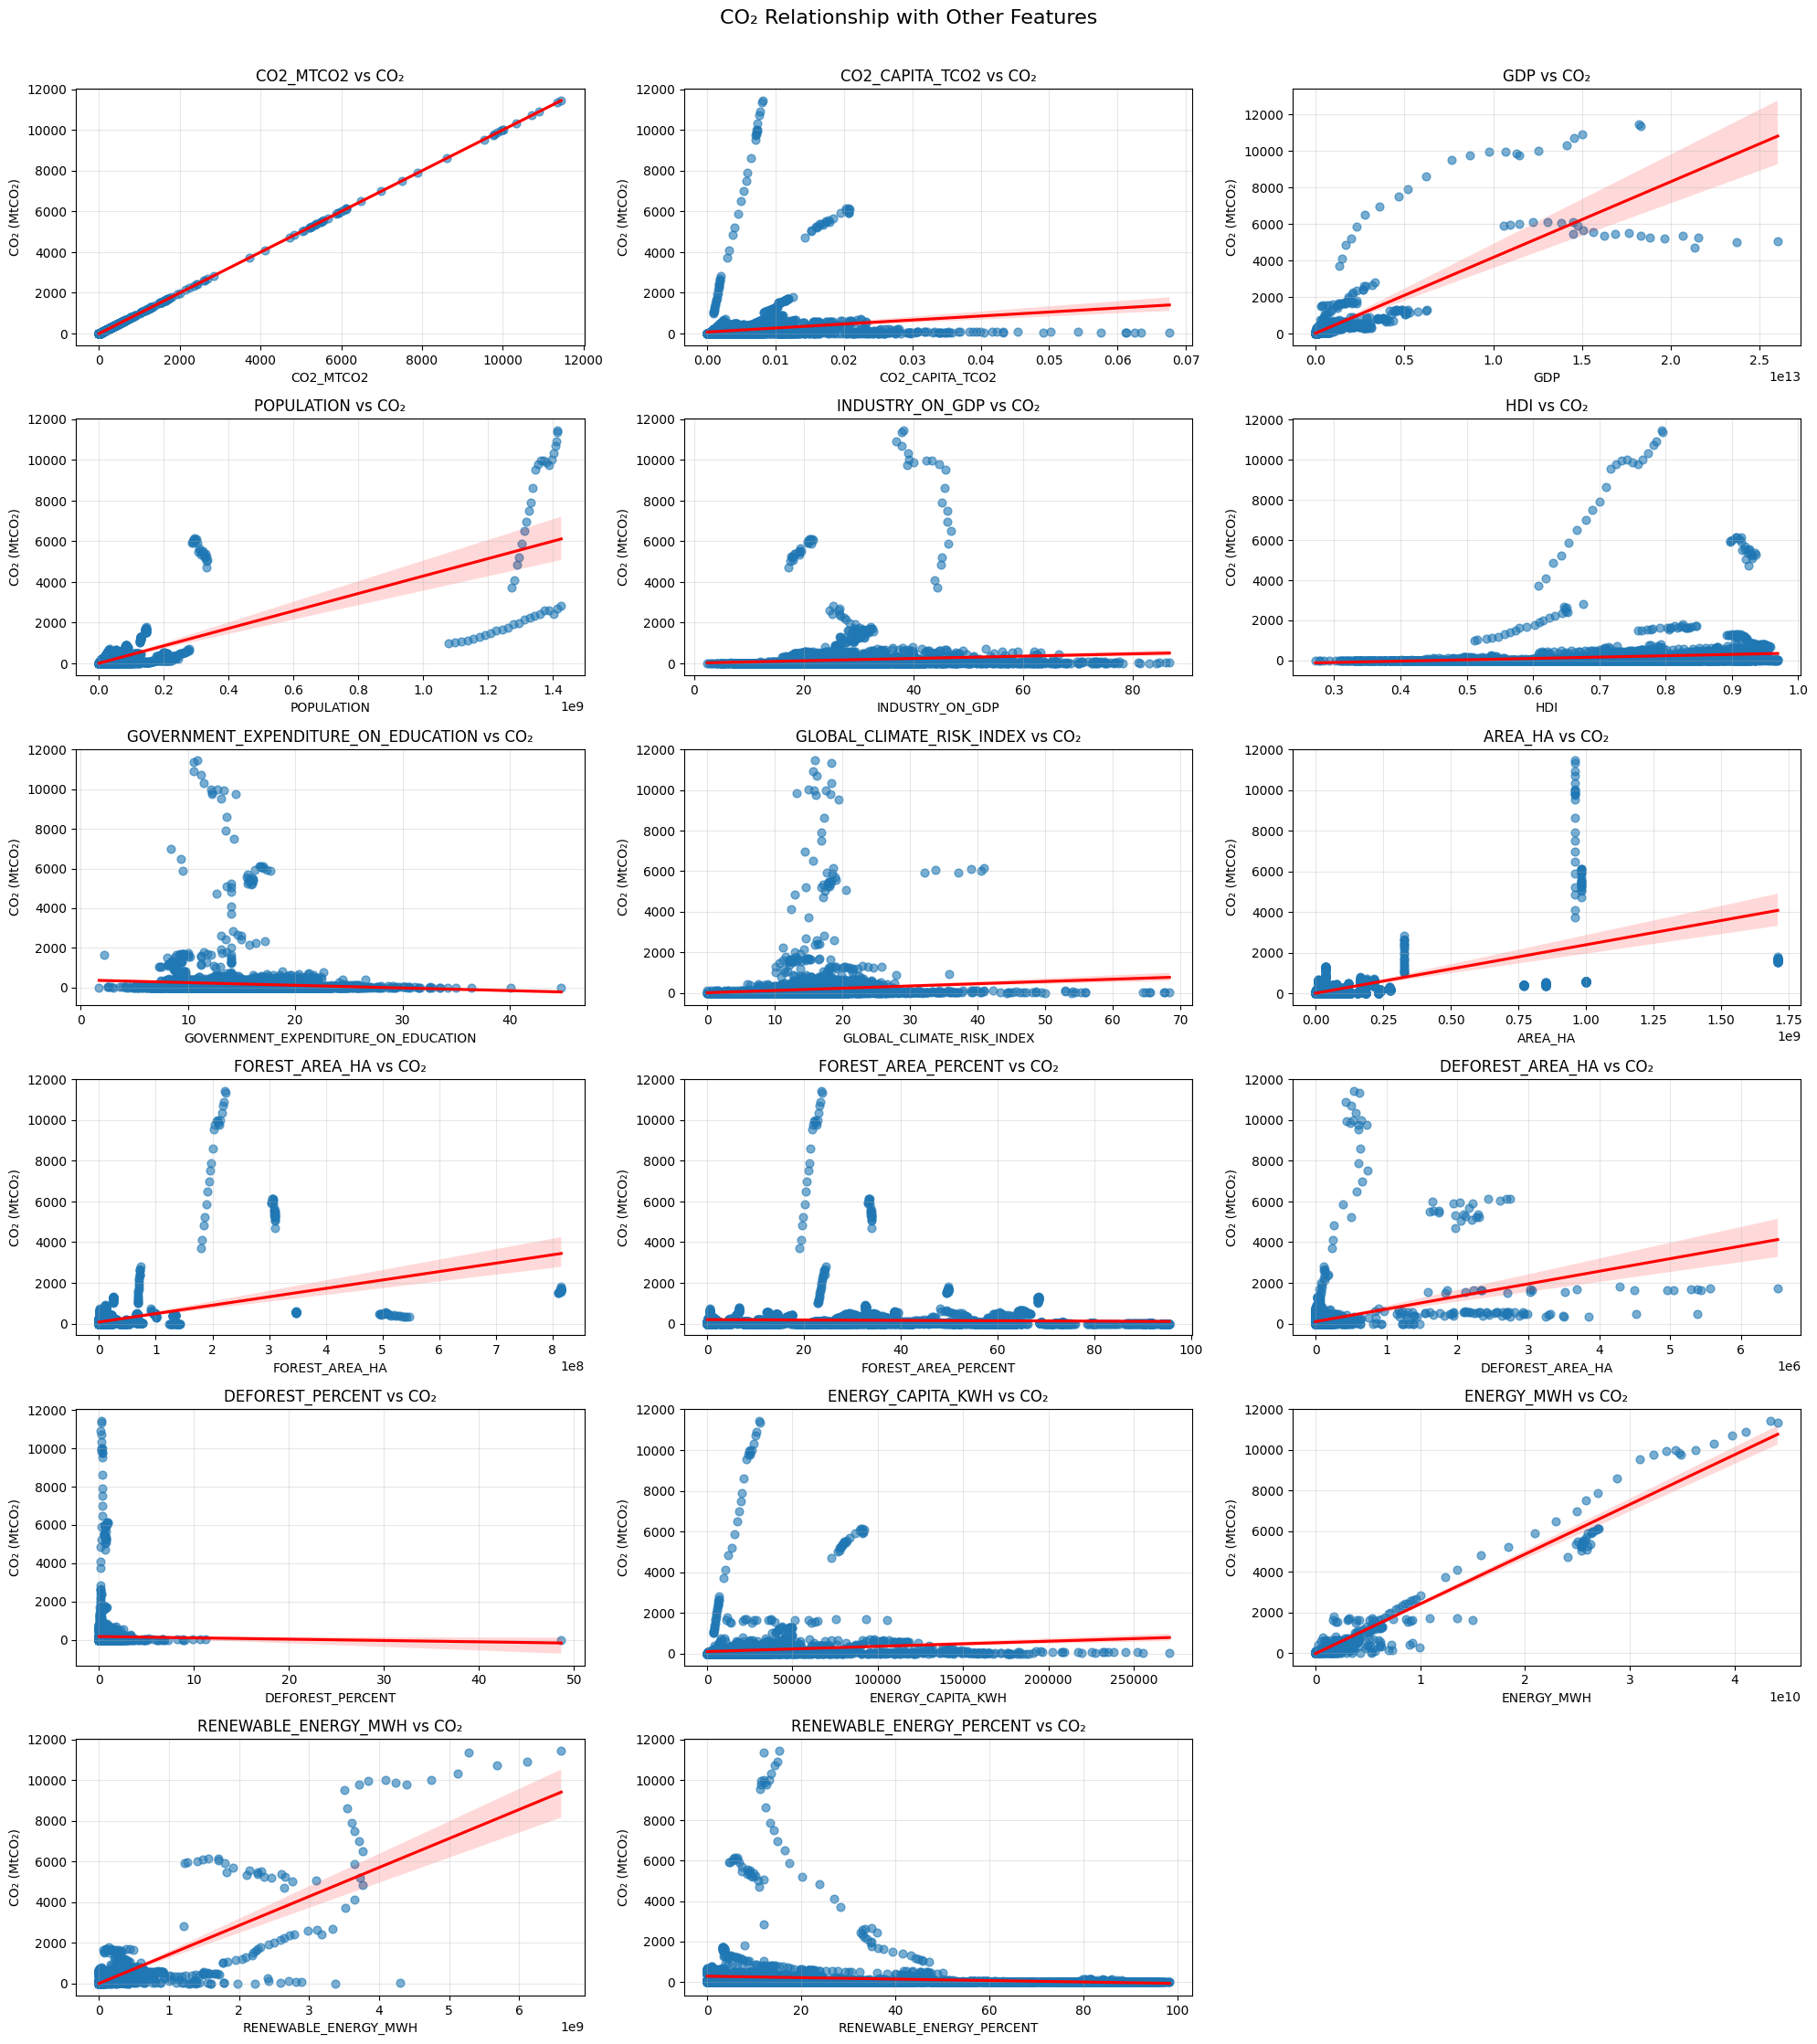

In [41]:
fig, axes = plt.subplots(7, 3, figsize=(20, 25))
axes = axes.flatten()

for i, feature in enumerate(feature_cols):
    sns.regplot(
        data=df,
        x=feature,
        y="Co2_MtCO2",
        scatter_kws={'alpha': 0.6, 's': 40},
        line_kws={'color': 'red'},
        ax=axes[i],
    )
    axes[i].set_title(f"{feature.upper()} vs CO₂", fontsize=12)
    axes[i].set_xlabel(feature.upper())
    axes[i].set_ylabel("CO₂ (MtCO₂)")
    axes[i].grid(True, alpha=0.3)
    axes[i].legend().set_visible(False)

# Ẩn ô trống nếu không đủ số biểu đồ
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("CO₂ Relationship with Other Features", fontsize=16, y=1.02)
plt.show()